In [2]:
# Generate data specifically cubic data, y= x^{3}- 3x + 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

x_data = np.arange(-3, 3, .1)
y_numeric = x_data ** 3 - 3 * x_data + 2


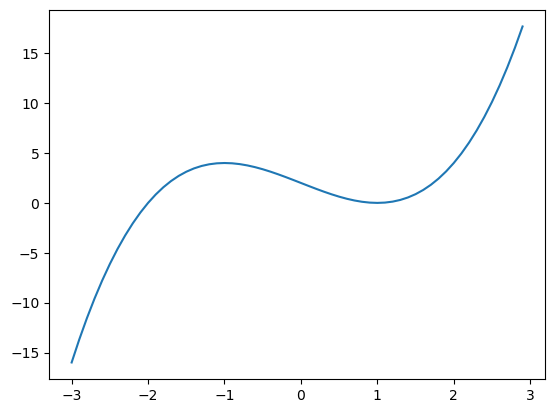

In [3]:
# Plot original data

plt.plot(x_data, y_numeric, -3, 3)
plt.show()

# Neural Network 1: Regression, no hidden layer

In [4]:
# Neural network 1, no hidden layer, regression (should duplicate linear regression)

# Activation function is identity function (not sigmoid)
# Loss function is squared error

X_train = np.array(x_data).reshape((-1, 1))
y_train = y_numeric

W = np.array([[.1]])
b = np.array([.2])

def relu(z):
    return np.maximum(0, z)

def relu_deriv(z):
    if z >= 0: 
        return 1 
    else: return 0

def compute_loss(a, y):
    return .5 * (a - y) ** 2

def compute_cost(X_data, y_data, W, b):
    m = X_data.shape[0] # number of data points
    cost = 0
    
    for i in range(m):
        y_hat = run_model(X_data[i], W, b)
        y = y_data[i]
        cost += compute_loss(y_hat, y)
    total_cost = (1 / (2 * m)) * cost

    return total_cost

def run_model(x, W, b):
    return x @ W + b

def loss_deriv(a, y):
    return a-y

def backward_prop(x, y, W, b):

    z1 = x @ W + b
    a1 = z1
    
    # compute dL/dw0 
    dL_da = loss_deriv(a1, y)
    da_dz = 1
    dz_dw0 = x[0]
    #print(dL_da, da_dz, dz_dw0)
    # multiply
    dL_dw0 = dL_da * da_dz * dz_dw0
    #print(dL_dw0, "AA")
    
    # compute dL/dw0 (first two pieces already done)
    dz_db = 1
    # multiply
    dL_db = dL_da * da_dz * dz_db

    #print(dL_dw0, dL_db, "DD")
    
    return dL_dw0, dL_db

In [5]:
run_model(X_train[0], W, b)

array([-0.1])

In [6]:
compute_cost(X_train, y_train, W, b)

array([8.73643613])

In [7]:
backward_prop(X_train[0], y_train[0], W, b)

(array([-47.7]), array([15.9]))

In [8]:
# gradient descent:

W = np.array([[-.1]])
b = np.array([.2])
ALPHA = .0006

J_sequence = []

#print("x train is", X_train)
#print("y train is", y_train)

for ctr in range(0, 6000):
    #print("Iteration: ", ctr)
    #print("W =", W)
    #print("Cost is", compute_cost(X_train, y_train, W))
    
    #for i in range(X_train.shape[0]):   # m
    #   #z1, a1 = forward_prop(W, X_train[i])
    #    dL_dw0, dL_db = backward_prop(X_train[i], y_train[i], W, b)
    #    ##print(backward_prop(X_train[i], y_train[i], W, b), "FF")
    #    #print("Gradients", dL_dw0, dL_db)
    #    W[0][0] -= ALPHA * dL_dw0
    #    b[0] -= ALPHA * dL_db
    #    J_sequence.append(compute_cost(X_train, y_train, W, b))
        
    #"batch" gradient descent:
    grads = [0,0]
    for i in range(X_train.shape[0]):   # m
        #z1, a1 = forward_prop(W, X_train[i])
        dL_dw0, dL_db = backward_prop(X_train[i], y_train[i], W, b)
        #print("Gradients", dL_dw0, dL_dw1)
        #W[0][0] -= ALPHA * dL_dw0
        #W[0][1] -= ALPHA * dL_dw1
        grads[0] += dL_dw0
        grads[1] += dL_db   
    W[0][0] -= ALPHA * grads[0]/X_train.shape[1]
    b[0] -= ALPHA * grads[1]/X_train.shape[1]
                              
    J_sequence.append(compute_cost(X_train, y_train, W, b))
    
print("Final W:", W, b)
print("Final cost:", compute_cost(X_train, y_train, W, b))

/var/folders/82/ggzm270j02x33q80b17g61tw0000gn/T/ipykernel_14552/241565519.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W[0][0] -= ALPHA * grads[0]/X_train.shape[1]
/var/folders/82/ggzm270j02x33q80b17g61tw0000gn/T/ipykernel_14552/241565519.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b[0] -= ALPHA * grads[1]/X_train.shape[1]


Final W: [[2.404]] [1.8202]
Final cost: [4.1899738]


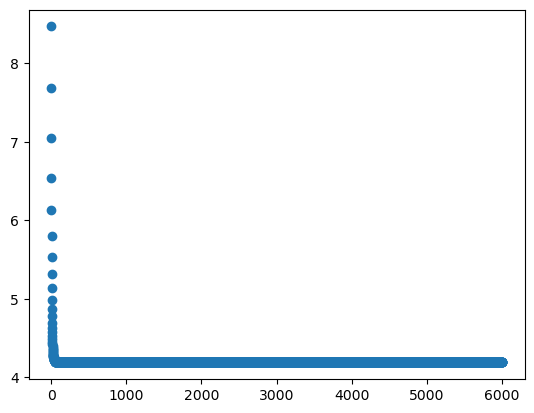

In [9]:
# Let's plot the cost as a function of number of iterations of the
# gradient descent algorithm.

plt.scatter(range(0, len(J_sequence)), J_sequence)
plt.show()

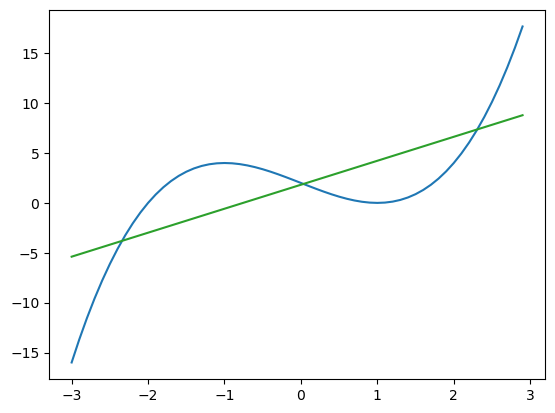

In [10]:
# Recreate original plot

y_predicted = [run_model([x], W, b) for x in x_data]
plt.plot(x_data, y_numeric, -3, 3)
plt.plot(x_data, y_predicted)
plt.show()

In [11]:
# Verify this matches linear regression

# Download and install scikit-learn if not already done:
%pip install scikit-learn

# Import the logistic regression functionality from scikit-learn
from sklearn.linear_model import LinearRegression

# Create a logistic regression model and train it on our training data:
model = LinearRegression(fit_intercept=True).fit(X_train, y_train)

# model.coef_ contains the w vector that this linear regression model was able to find

print("w found through scikit-learn:", model.coef_, model.intercept_)

Note: you may need to restart the kernel to use updated packages.
w found through scikit-learn: [2.404] 1.8202000000000087


# Neural Network 2, 1 hidden layer with 2 neurons, regression



In [12]:
# Neural network 1, no hidden layer, regression (should duplicate linear regression)

# Activation function is identity function (not sigmoid)
# Loss function is squared error

X_train = np.array(x_data).reshape((-1, 1))
y_train = y_numeric

W1 = np.random.rand(1, 3)
W2 = np.random.rand(3, 1)
b1 = np.random.rand(3)
b2 = np.random.rand(1)

def relu(z):
    return np.maximum(0, z)

def relu_deriv(z):
    if z >= 0: 
        return 1 
    else: return 0

def compute_loss(a, y):
    return .5 * (a - y) ** 2

def compute_cost(X_data, y_data, W1, b1, W2, b2):
    m = X_data.shape[0] # number of data points
    cost = 0
    
    for i in range(m):
        y_hat = run_model(X_data[i], W1, b1, W2, b2)
        y = y_data[i]
        cost += compute_loss(y_hat, y)
    total_cost = (1 / (2 * m)) * cost

    return total_cost

def run_model(x, W1, b1, W2, b2):
    z1 = x @ W1 + b1
    a1 = relu(z1)
    z2 = a1 @ W2 + b2
    a2 = z2
    return a2

def loss_deriv(a, y):
    return a-y

def backward_prop(x, y, W1, b1, W2, b2):
    z1 = x @ W1 + b1
    a1 = relu(z1)
    z2 = a1 @ W2 + b2
    a2 = z2

    #y = np.atleast_2d(y).T
    #print("shape of y", y.shape)

    #print('shapes for dL/dW2')
    #print(np.atleast_2d(a1).T.shape)
    #print(np.atleast_2d(a2 - y).shape)

    #print('shapes for dL/dW1')
    #print(np.atleast_2d(x).T.shape)
    #print(np.atleast_2d(a2 - y).shape)
    #print(np.atleast_2d(W2.T).shape)
    #print(((z1 > 0).astype(int)).shape)
    
    grad_W2 = np.atleast_2d(a1).T @ np.atleast_2d(a2 - y)
    grad_W1 = np.atleast_2d(x).T @ np.atleast_2d(a2 - y) @ W2.T * ((z1 > 0).astype(int))
    grad_b2 = np.sum(np.atleast_2d(a2 - y), axis=0)
    grad_b1 = np.sum(np.atleast_2d(a2 - y) @ W2.T * ((z1 > 0).astype(int)), axis=0)
    
    #print("gW1", grad_W1)
    #print("gW2", grad_W2)
    #print("gb1", grad_b1)
    #print("gb2", grad_b2)

    return grad_W1, grad_b1, grad_W2, grad_b2

In [13]:
run_model(X_train[0], W1, b1, W2, b2)

array([0.06643378])

In [14]:
compute_cost(X_train, y_train, W1, b1, W2, b2)

array([7.32343698])

In [15]:
backward_prop(X_train[0], y_train[0], W1, b1, W2, b2)

(array([[-0.        , -1.05440894, -0.        ]]),
 array([0.        , 0.35146965, 0.        ]),
 array([[ 0.       ],
        [10.6645376],
        [ 0.       ]]),
 array([16.06643378]))

In [38]:
# gradient descent:

W1 = np.random.rand(1, 2)
W2 = np.random.rand(2, 1)
b1 = np.random.rand(2)
b2 = np.random.rand(1)
ALPHA = .01

J_sequence = []

#print("x train is", X_train)
#print("y train is", y_train)

for ctr in range(0, 3000):
    
    grad_W1 = np.zeros(W1.shape)
    grad_W2 = np.zeros(W2.shape)
    grad_b1 = np.zeros(b1.shape)
    grad_b2 = np.zeros(b2.shape)
    for i in range(X_train.shape[0]):   # m
        gW1, gb1, gW2, gb2 = backward_prop(X_train[i], y_train[i], W1, b1, W2, b2)
        grad_W1 += gW1
        grad_b1 += gb1
        grad_W2 += gW2
        grad_b2 += gb2
    W1 -= ALPHA * grad_W1/X_train.shape[0]
    b1 -= ALPHA * grad_b1/X_train.shape[0]
    W2 -= ALPHA * grad_W2/X_train.shape[0]
    b2 -= ALPHA * grad_b2/X_train.shape[0]
                              
    J_sequence.append(compute_cost(X_train, y_train, W1, b1, W2, b2))
    
print("Final W:", W1, b1, W2, b2)
print("Final cost:", compute_cost(X_train, y_train, W1, b1, W2, b2))
#print(J_sequence)

Final W: [[2.33373529 0.72747408]] [-4.79971817  2.18486742] [[5.41453234]
 [2.26457239]] [-4.00576853]
Final cost: [3.13537113]


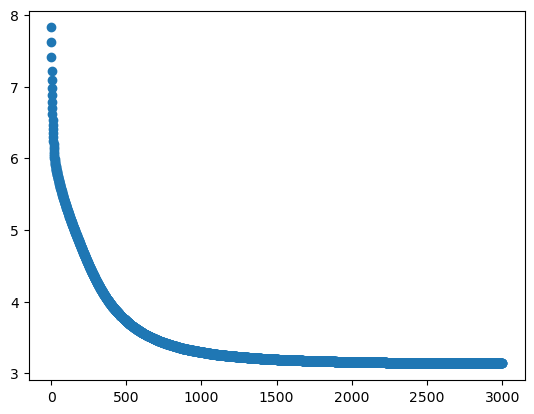

In [39]:
# Let's plot the cost as a function of number of iterations of the
# gradient descent algorithm.

plt.scatter(range(0, len(J_sequence)), J_sequence)
plt.show()

[[2.33373529 0.72747408]] [-4.79971817  2.18486742] [[5.41453234]
 [2.26457239]] [-4.00576853]


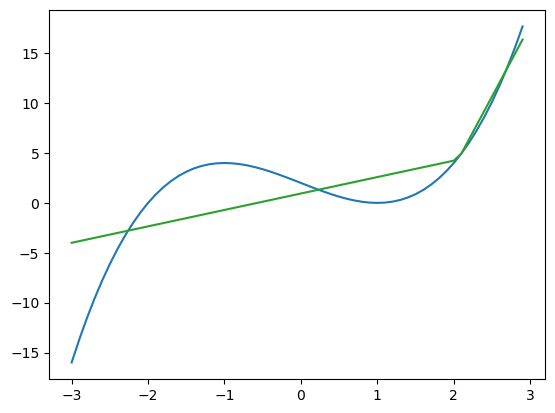

In [40]:
# Recreate original plot
print(W1, b1, W2, b2)
y_predicted = [run_model([x], W1, b1, W2, b2) for x in x_data]
plt.plot(x_data, y_numeric, -3, 3)
plt.plot(x_data, y_predicted)
plt.show()